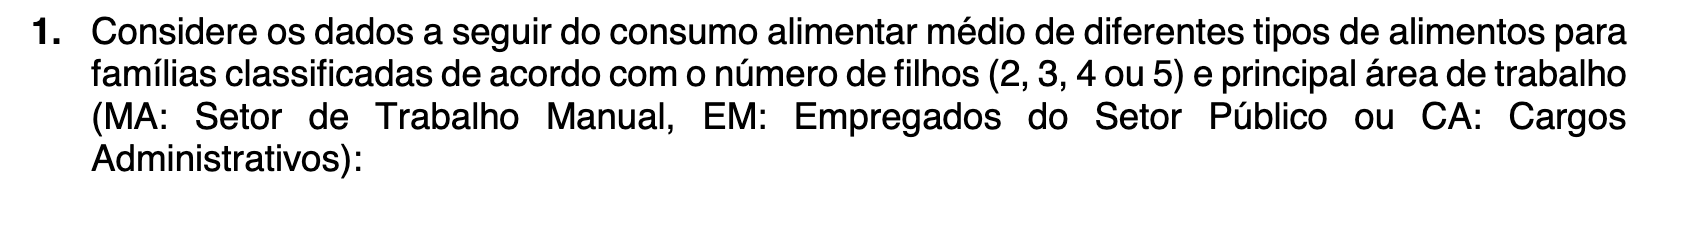

Vamos iniciar transcrevendo os dados do enunciado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame({'setor':[1,2,3,1,2,3,1,2,3,1,2,3 ],
                   'filhos':[2,2,2,3,3,3, 4,4,4,5,5,5 ],
                   'Paes'   :[332,  293,372, 406 ,386 ,438 ,534 ,460 ,385 ,655 ,584, 515],
                    'Vegetais':[428,559,767, 563 ,608 ,843 ,660 ,699 ,789 ,776 ,995,1097],
                    'Frutas':[354 ,388 ,562 ,341 ,396 ,689 ,367 ,484 ,621 ,423 ,548 ,887],
                    'Carnes':[1437,1527,1948,1507,1501,2345,1620,1856,2366,1848,2056,2630],
                    'Aves':  [526 ,567,927, 545 ,None ,1148,638 ,762 ,1149,759 ,893 ,1167],                 
                    'Leite': [247 ,239 ,235 ,324 ,319 ,243 ,414 ,499 ,304 ,495 ,518 ,561],
                    'Aloolicos':[427,258,433,407, 363 ,341 ,407 ,416 ,282 ,486 ,319 ,284]
                  })

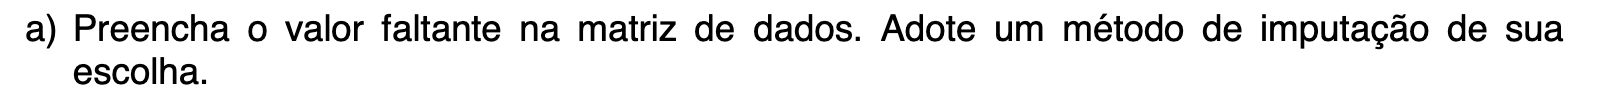

Vamos imputar o valor o valor missing utilizando o valor médio

In [3]:
df[['Aves']] = df[['Aves']].fillna(np.mean(df[['Aves']]))

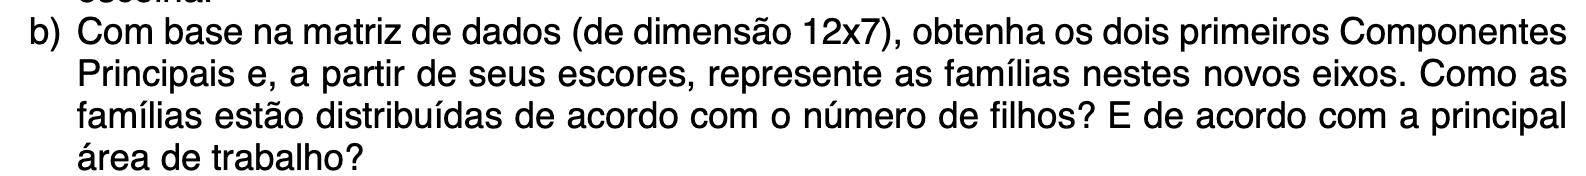

Entendemos que as variáveis são todas medidas na mesma escala e que as diferenças nas médias das variáveis deve ser levada em consideraçao na análise de PCA. Para a resolução usaremos a função PCA do paco te sklearn.decomposition. O código abaixo calcula os compontentes principais e o trazemos no print o valor das cargas dos componentes e o percentual de variância explicada.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = df[['Paes','Vegetais','Frutas','Carnes','Aves','Leite','Aloolicos']]
principalComponents = pca.fit_transform(X)
print(np.round(pca.components_,1))
print()
print(pca.explained_variance_ratio_)

[[ 0.1  0.3  0.3  0.8  0.4  0.1 -0.1]
 [ 0.6  0.4 -0.1 -0.1 -0.3  0.6  0.2]]

[0.86159577 0.09000656]


O primeiro componente pode ser interpretado como o componente relacionado ao consumo de carnes e aves e frutas, enquanto o segundo componente é associado ao consumo de pães e leite.

O código abaixo vai desenhar o gráfico das observações nos eixos obtidos a partir dos dois componentes principais

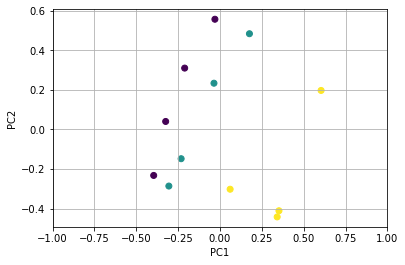

In [5]:

def Plot_PCA_score(score,c=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,c=c)
    plt.xlim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#grafico setor
Plot_PCA_score(principalComponents[:,0:2],df['setor'])
plt.show()


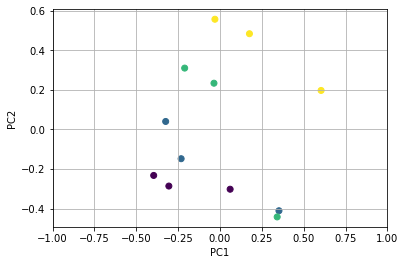

In [6]:
#Gráfico filhos
Plot_PCA_score(principalComponents[:,0:2],df['filhos'])
plt.show()

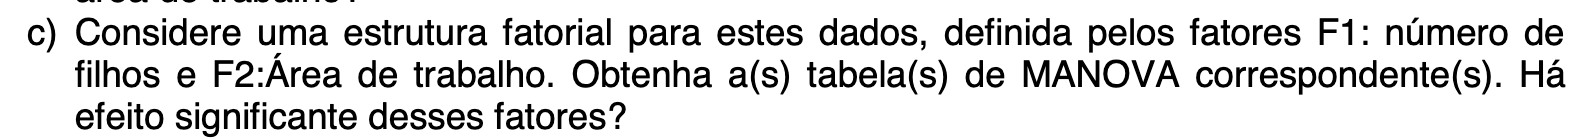

In [7]:
from statsmodels.multivariate.manova import MANOVA

In [8]:
manova = MANOVA.from_formula('Paes + Vegetais + Frutas + Carnes + Aves + Leite + Aloolicos ~ setor + filhos',data = df)
print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept         Value  Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda  0.0634 7.0000 3.0000  6.3277 0.0788
           Pillai's trace  0.9366 7.0000 3.0000  6.3277 0.0788
   Hotelling-Lawley trace 14.7646 7.0000 3.0000  6.3277 0.0788
      Roy's greatest root 14.7646 7.0000 3.0000  6.3277 0.0788
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          setor           Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda   0.0079 7.0000 3.0000 53.9805 0.0038
          Pillai's trace   0.9921 7.0000 3.0000 53.9805 0.0038
  Hotelling

Analisando os resultados da MANOVA notamos que, independente do teste estatistico utilizadom o efeito da variavel setor e filhos e' significante no modelo.

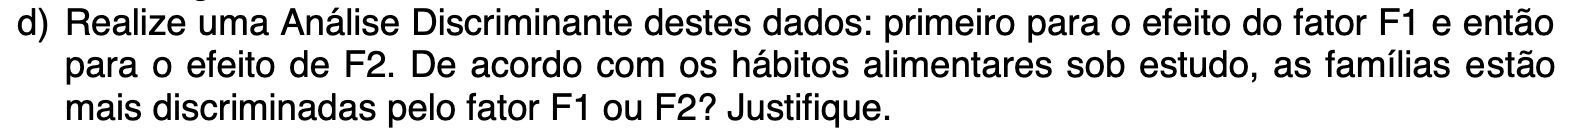

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [19]:
X = df[['Paes','Vegetais','Frutas','Carnes','Aves','Leite','Aloolicos']]
y1 = df[['filhos']]
y2 = df[['setor']]
                    
lda1 = LinearDiscriminantAnalysis().fit(X , np.ravel(y1))
y1_predict = lda1.predict(X)

lda2 = LinearDiscriminantAnalysis().fit(X , np.ravel(y2))
y2_predict = lda2.predict(X)

In [49]:
lda1.explained_variance_ratio_

array([0.98622278, 0.01037927, 0.00339795])

/opt/anaconda3/envs/dcuoliveira/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


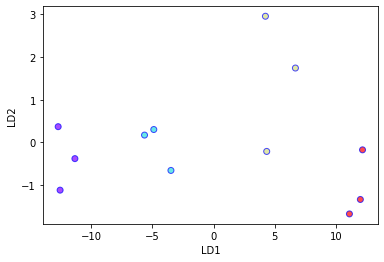

In [67]:
le = LabelEncoder()
X_lda1 = LinearDiscriminantAnalysis().fit_transform(X, np.ravel(y1))
y1label = le.fit_transform(y1)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda1[:,0],
    X_lda1[:,1],
    c=y1label,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [50]:
lda2.explained_variance_ratio_

array([0.95853791, 0.04146209])

/opt/anaconda3/envs/dcuoliveira/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


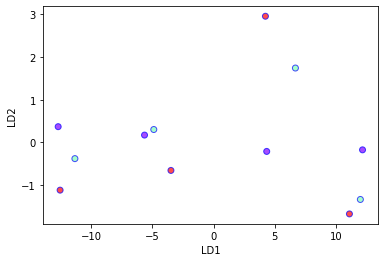

In [68]:
X_lda2 = LinearDiscriminantAnalysis().fit_transform(X, np.ravel(y2))
y2label = le.fit_transform(y2)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda1[:,0],
    X_lda1[:,1],
    c=y2label,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

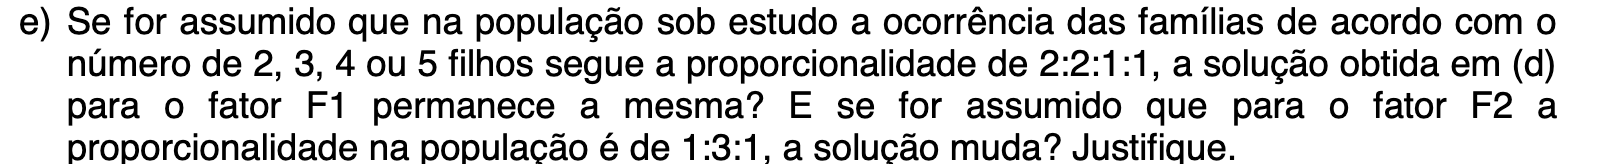

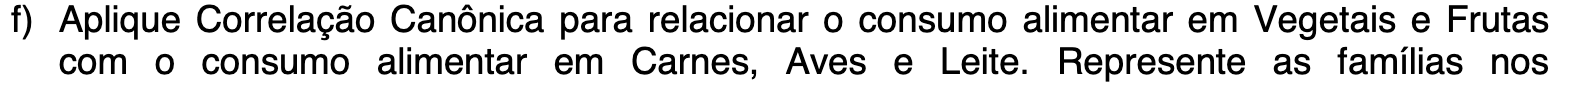

O código abaixo decompomos o banco de duas em duas tabelas e performamos uma análise de correlação canonica. 

In [52]:
from sklearn.cross_decomposition import CCA

X = df[['Paes','Vegetais','Frutas']]
Y = df[['Carnes','Aves','Leite']]

cca = CCA(n_components=2)
cca.fit(X, Y)

print(np.round(cca.x_weights_,2))
print()
print(np.round(cca.y_weights_,2))

X_c, Y_c = cca.transform(X, Y)


[[ 0.32  0.86]
 [ 0.1   0.39]
 [ 0.94 -0.33]]

[[ 0.94 -0.34]
 [ 0.16  0.26]
 [ 0.31  0.9 ]]


Analisando as cargas para o primeiro par de variáveis canônicas, temos que para $U_1$ pode ser interpretado como o consumo e frutas enquanto $V_1$ é interpretado como o consumo de carne. Para o segundo par de componentes temos associado $U_2$ representando o consumo de pães enquanto $V_2$ representa o consumo de leite. 

Abaixo geramos a representação gráfica das observações nas coordenadas obtidas pelas variáveis canonicas

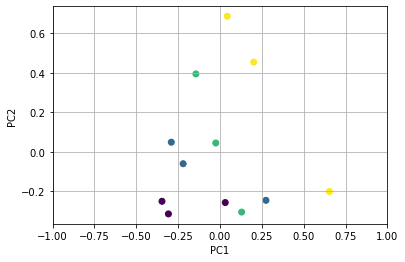

In [53]:
Plot_PCA_score(X_c[:,0:2],df['filhos'])

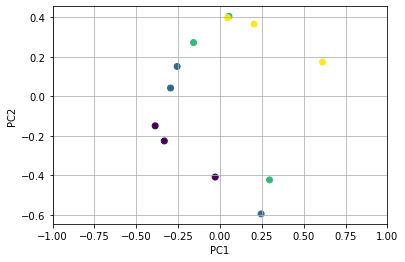

In [54]:
Plot_PCA_score(Y_c[:,0:2],df['filhos'])

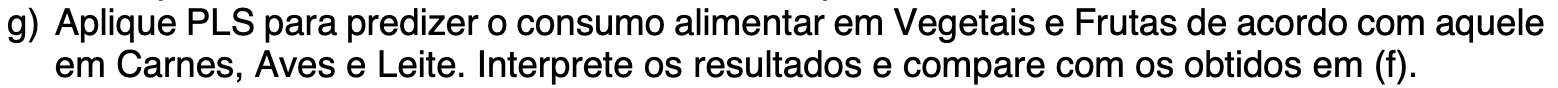

O código abaixo estima o modelo de PLS e gera a matriz com as cargas

In [55]:
from sklearn.cross_decomposition import PLSCanonical
plsca = PLSCanonical(n_components=2)
plsca.fit(X, Y)

print(np.round(plsca.x_weights_,2))
print()
print(np.round(plsca.y_weights_,2))
X_c, Y_c = plsca.transform(X, Y)

[[ 0.35  0.87]
 [ 0.67  0.02]
 [ 0.66 -0.49]]

[[ 0.66 -0.26]
 [ 0.6  -0.38]
 [ 0.45  0.89]]


Diferentemente do que acontece com CCA aqui o primeiro par de variáveis não possuem uma interpretação clara uma vez que não temos o acumulo das cargas em uma das variáveis, já o segundo par de variáveis preserva a mesma interpretação do caso anterior.

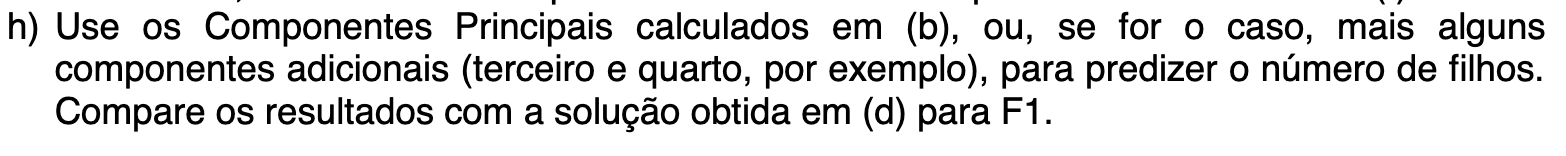

In [56]:
import statsmodels.api as sm

X = df[['Paes','Vegetais','Frutas','Carnes','Aves','Leite','Aloolicos']]
y = df[['filhos']]

pca = PCA(n_components=2)
pca_score = pca.fit_transform(X)

reg = sm.OLS(y,sm.add_constant(pca_score))
reg.fit().summary()


/opt/anaconda3/envs/dcuoliveira/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 filhos   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     31.34
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           8.80e-05
Time:                        14:04:12   Log-Likelihood:                -5.9155
No. Observations:                  12   AIC:                             17.83
Df Residuals:                       9   BIC:                             19.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5000      0.132     26.506      0.000       3.201       3.799
x1             0.0012      0.000      4.667      0.001       0.001       0.002
x2             0.0053      0.001      6.396      0.000       0.003       0.007
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                0.975
Skew:                           0.207   Prob(JB):                        0.614
Kurtosis:                       4.334   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Comparação com componentes principais?
y_pred = np.round(reg.fit().predict(sm.add_constant(pca_score)))
print(y_pred)
print(y)


[2. 2. 3. 3. 3. 3. 4. 4. 3. 5. 5. 5.]
    filhos
0        2
1        2
2        2
3        3
4        3
5        3
6        4
7        4
8        4
9        5
10       5
11       5


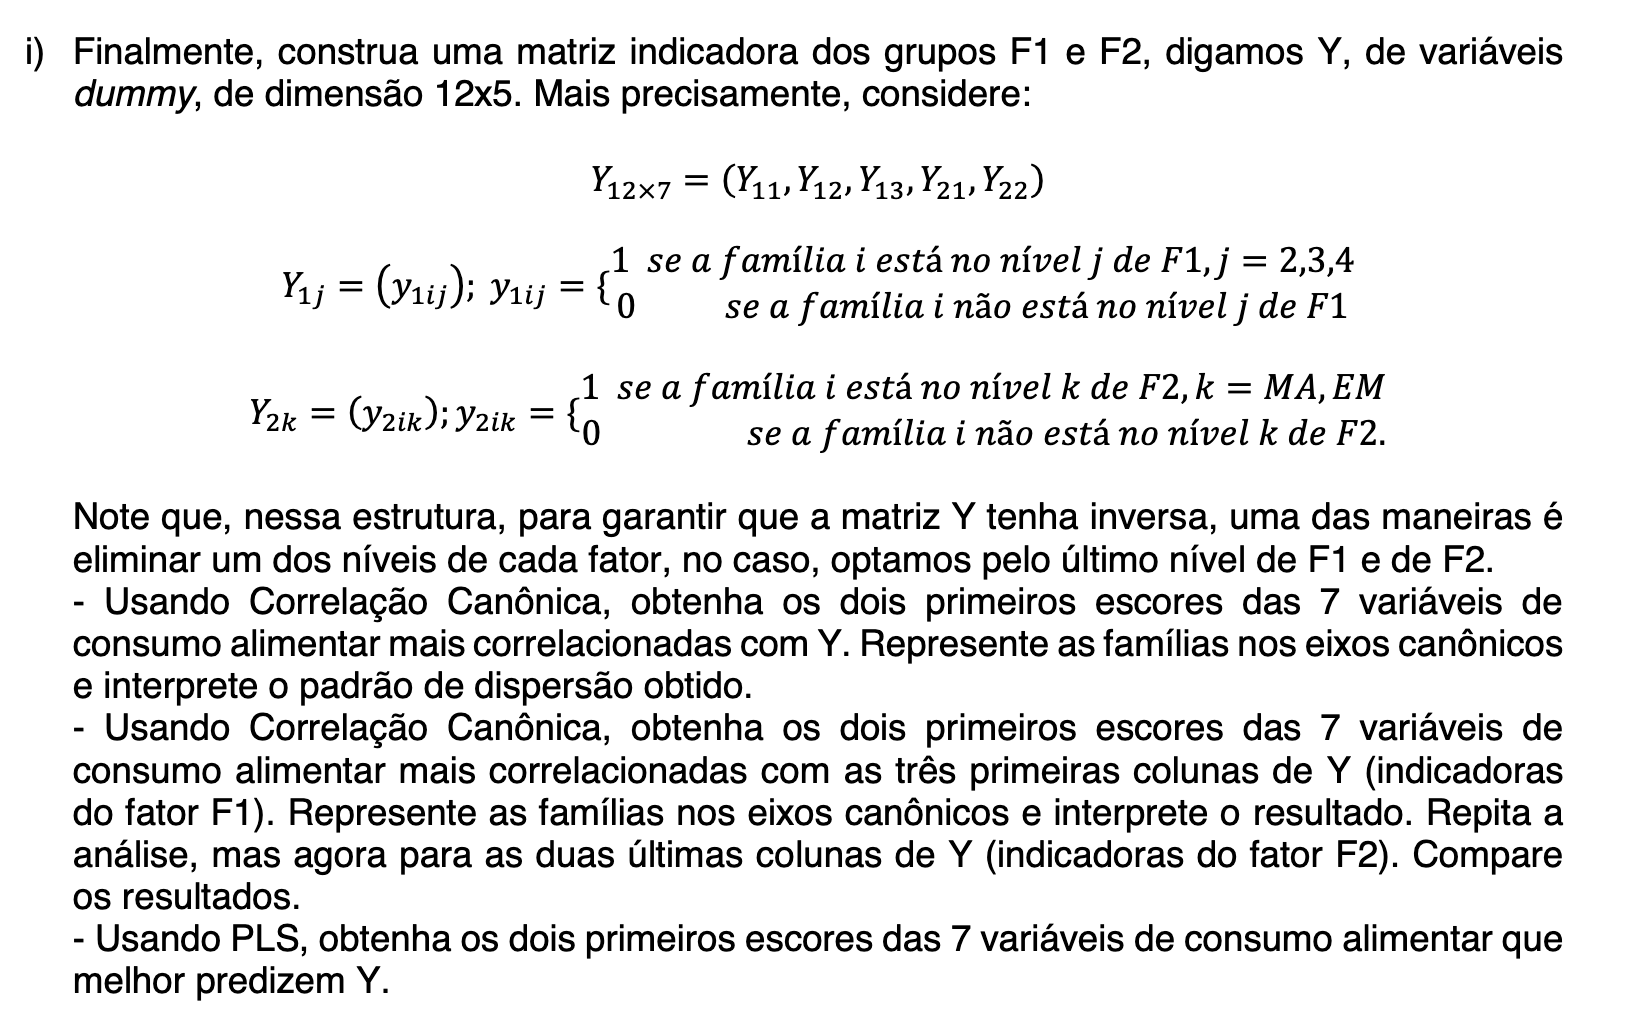

Como técnica proposta vamos utilizar a técnica de sparse pca + regression, primeiramente vamos obter as cargas do sparce PCA

In [58]:
from sklearn.decomposition import SparsePCA

X = df[['Paes','Vegetais','Frutas','Carnes','Aves','Leite','Aloolicos']]
y = df[['filhos']]

PCA2 = SparsePCA(n_components = 2,alpha = 100)
PCA2.fit(X)
sparcePCA_score = PCA2.transform(X)
print(np.round(PCA2.components_,2))


[[ 0.    0.25  0.29  0.81  0.44  0.   -0.01]
 [-0.54 -0.49  0.    0.    0.   -0.69  0.  ]]


Como temos poucos dados utilizamos um coeficiente alpha bem pesado, é interessante observar que a conclusão é muito semelhante com o que obtemos no caso de PCA clássico, mas o lasso facilita a interpretação uma vez que leva a zero os coeficientes menos relevantes

In [59]:
reg = sm.OLS(y,sm.add_constant(sparcePCA_score))
reg.fit().summary()

/opt/anaconda3/envs/dcuoliveira/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 filhos   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     33.44
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           6.82e-05
Time:                        14:06:34   Log-Likelihood:                -5.5750
No. Observations:                  12   AIC:                             17.15
Df Residuals:                       9   BIC:                             18.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5000      0.128     27.269      0.000       3.210       3.790
x1             0.0004      0.000      1.499      0.168      -0.000       0.001
x2            -0.0057      0.001     -6.989      0.000      -0.008      -0.004
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                1.409
Skew:                           0.302   Prob(JB):                        0.494
Kurtosis:                       4.567   Cond. No.                         479.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo possui um ganho marginal em performance quando analisamos R² no entanto perde quano analisamos o BIC. Nesse caso o principal ganho é na facilidade de se interpretar os coeficientes

In [60]:
#Comparação com componentes principais?
y_pred = np.round(reg.fit().predict(sm.add_constant(sparcePCA_score)))
print(y_pred)
print(y)

[2. 2. 3. 3. 3. 3. 4. 4. 3. 5. 5. 5.]
    filhos
0        2
1        2
2        2
3        3
4        3
5        3
6        4
7        4
8        4
9        5
10       5
11       5
